In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [166]:
import sys
sys.path.append('../')
from cross_match import *

In [74]:
from utils import read_fits_to_pandas

In [76]:
galah = read_fits_to_pandas('/data/jls/galah/galah_dr2.fits')

In [46]:
g2 = pd.read_hdf('/data/jls/GaiaDR2/spectro/GALAH_input.hdf5')

In [177]:
g2_g = crossmatch_2mass_gaia_sourceid(g2)


        select * from mytable as m left join gaia_dr2_aux.gaia_source_2mass_xm as s on s.source_id=m.source_id


In [206]:
np.count_nonzero(g2.source_id<0.)

516

In [208]:
np.count_nonzero(np.abs(g2_g.k_m-g2.K)>1e-3)

0

In [188]:
gg = g2.reset_index()[g2_g.source_id<0.]

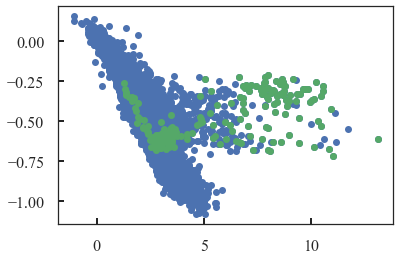

In [205]:
plt.plot(g2.G-g2.K,g2.H-g2.J,'.')
plt.plot(gg.G-gg.K,gg.H-gg.J,'.')

In [47]:
g2_t = crossmatch_2mass_ids_gaia_version2(g2, dist_max=3.)


        select tt.* from mytable as m left join lateral
        (select * from gaia_dr2_aux.gaia_source_2mass_xm as s where q3c_join(m.ra,m.dec,s.ra,s.dec,0.00027778) and abs(s.j_m-m.j)<1e-3 order by q3c_dist(m.ra,m.dec,s.t_ra,s.t_decl)  asc limit 1)
        as tt on true order by xid


In [82]:
g = pd.concat([g2[['sobject_id']].reset_index(),g2_t],axis=1)

print np.count_nonzero(g2_t.source_id!=g2['source_id'])

g3 = g.merge(g2,on='sobject_id')
g3 = g3[(g2_t.source_id!=g2['source_id'])].reset_index(drop=True)

7400


In [163]:
def grab_cutout(ra, dec):
    p = sqlutil.get('select * from gaia_dr2_aux.gaia_source_2mass_xm as g where q3c_radial_query(g.ra, g.dec, %0.9f, %0.9f, 10./3600.)'%(ra,dec),
                   host='cappc127',
                  user='jason_sanders',
                  password=wsdbpassword,
                  preamb='set enable_seqscan to off; ' +
                  'set enable_mergejoin to off; ' +
                  'set enable_hashjoin to off;',
                  asDict=True,
                  strLength=30)
    return pd.DataFrame.from_dict(p)

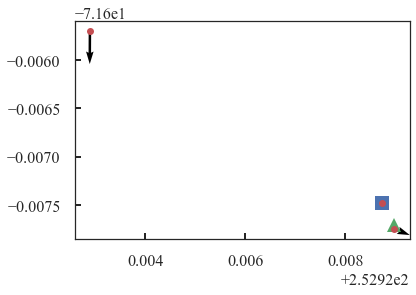

In [164]:
xx=49
pp = grab_cutout(g3.ra_x[xx], g3.dec_x[xx])
plt.plot(g3.ra_x[xx],g3.dec_x[xx],'s',label='Galah catalogue')
plt.plot(g3.ra_y[xx],g3.dec_y[xx],'^',label='Match Gaia')
plt.plot(pp.ra,pp.dec,'.')
plt.quiver(pp.ra,pp.dec,pp.pmra,pp.pmdec)

In [157]:
g3.ra_y[28], g3.ra_x[28]

(252.543567, 252.543043603594)

In [161]:
g3.dist[40:50]

40         NaN
41         NaN
42         NaN
43    0.000265
44    0.000103
45         NaN
46    0.000115
47         NaN
48         NaN
49    0.000239
Name: dist, dtype: float64

In [99]:
print g3.G[19],g3.phot_g_mean_mag[19]

13.9828 15.9107


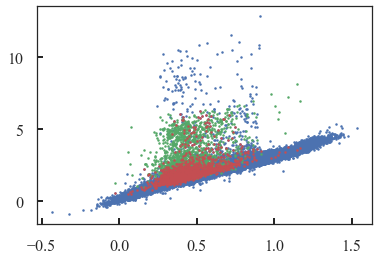

In [95]:
plt.plot(g2.J-g2.K,g2.G-g2.H,'.',ms=5)
plt.plot(g3.j_m-g3.k_m,g3.phot_g_mean_mag-g3.h_m,'.',ms=5)
plt.plot(g3.j_m-g3.k_m,g3.G-g3.h_m,'.',ms=5)

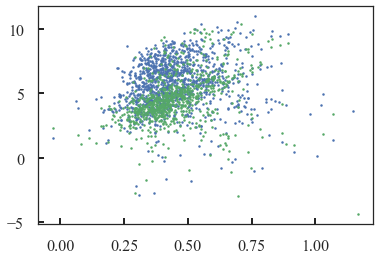

In [65]:
plt.plot(g3.j_m-g3.k_m,g3.phot_g_mean_mag-5.*np.log10(100./g3.parallax_y),'.',ms=5)
plt.plot(g3.j_m-g3.k_m,g3.G-5.*np.log10(100./g3.parallax_x),'.',ms=5)

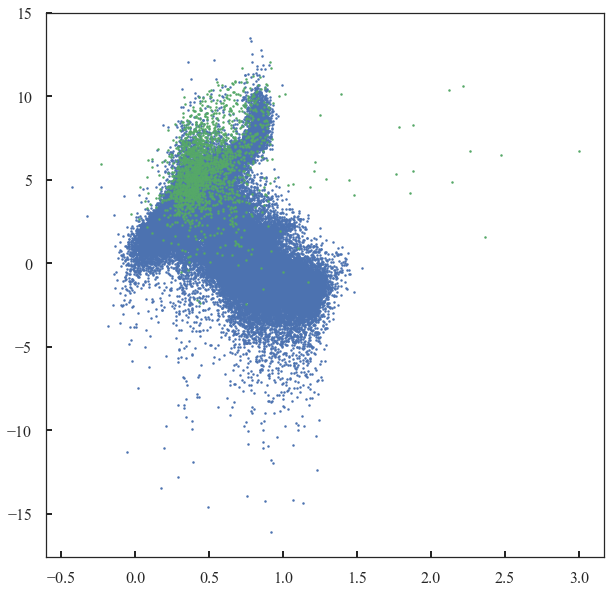

In [34]:
plt.figure(figsize=[10.,10.])
plt.plot(g2.J-g2.K,g2.G-5.*np.log10(100./g2.parallax),'.',ms=5)
plt.plot(g.j_m-g.k_m,g.phot_g_mean_mag-5.*np.log10(100./g.parallax),'.',ms=5)


[]

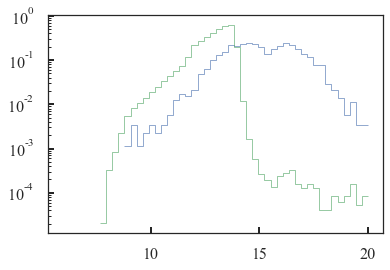

In [22]:
plt.hist(g.phot_g_mean_mag,range=[6.,20.],bins=50,histtype='step',normed=True);
plt.hist(g2.G,range=[6.,20.],bins=50,histtype='step',normed=True);
plt.semilogy()